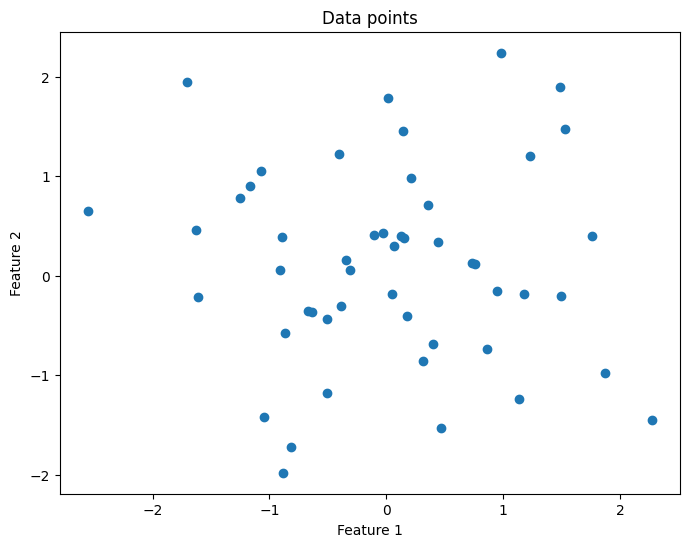

In [2]:
import numpy as np

# Generate a random dataset with 50 samples and 2 features
np.random.seed(0)
X = np.random.randn(50, 2)



import matplotlib.pyplot as plt

def plot_data(X):
    # Plot the data points
    plt.figure(figsize=(8, 6))
    # Put a caption on the plot
    plt.title('Data points')
    # Label the x-axis
    plt.xlabel('Feature 1')
    # Label the y-axis
    plt.ylabel('Feature 2')
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()

def plot_data_clusters(X, labels, centroids):
    # Plot the data points and their assigned labels
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x')
    plt.show()


plot_data(X)

[2 1 2 2 1 1 2 1 2 2 0 2 2 2 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 2 0 0 2 2
 2 0 0 0 2 1 2 1 1 1 1 1 1]


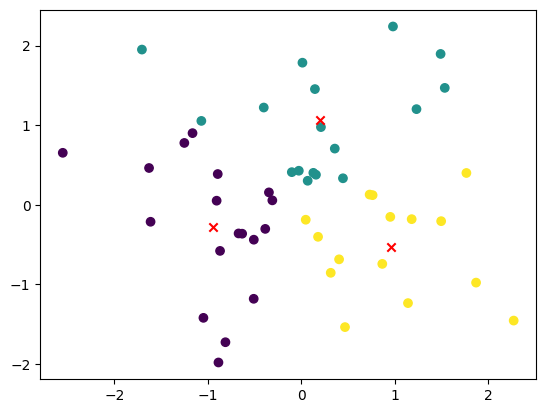

In [3]:
from scipy.cluster.vq import kmeans, vq

# Specify the number of clusters
k = 3

# Perform k-means clustering on the dataset
centroids, _ = kmeans(X, k)

# Assign each data point to a cluster
labels, _ = vq(X, centroids)

# Print the assigned labels
print(labels)

plot_data_clusters(X, labels, centroids)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 1 0 0 0 1 1 0 0 0 0]


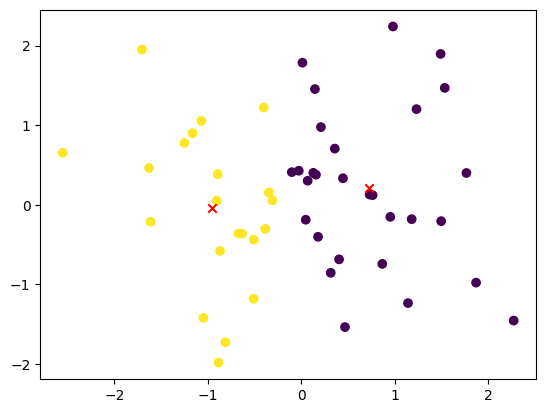

In [4]:
# Specify the number of clusters
k = 2

# Perform k-means clustering on the dataset
centroids, _ = kmeans(X, k)

# Assign each data point to a cluster
labels, _ = vq(X, centroids)

# Print the assigned labels
print(labels)

plot_data_clusters(X, labels, centroids)


In [5]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Evaluate the clustering results using the Silhouette score
silhouette = silhouette_score(X, labels)
print(f'Silhouette score: {silhouette:.2f}')

# Evaluate the clustering results using the Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X, labels)
print(f'Calinski-Harabasz index: {calinski_harabasz:.2f}')


Silhouette score: 0.31
Calinski-Harabasz index: 25.77


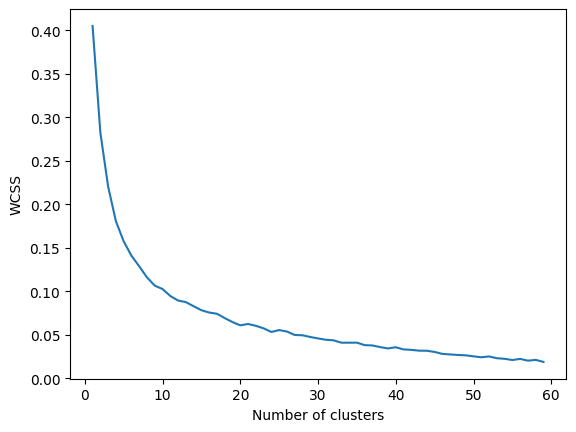

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

# Generate a random dataset
np.random.seed(62)
X = np.random.rand(100, 2)

# Compute the WCSS for different numbers of clusters
wcss = []
for k in range(1, 60):
    centroids, distortion = kmeans(X, k)
    wcss.append(distortion)

# Plot the WCSS vs. the number of clusters
plt.plot(range(1, 60), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


[1 2 2 2 0 2 2 2 0 1 0 2 2 1 1 1 2 1 0 2 2 1 1 0 0 1 0 0 2 2 1 1 2 2 1 2 2
 0 1 0 0 0 2 2 0 2 2 0 2 1 0 2 2 0 1 2 0 2 0 2 1 1 0 1 0 2 0 2 2 1 0 0 2 2
 0 1 1 0 1 0 1 1 0 2 0 2 0 2 0 2 1 0 1 2 2 2 0 0 0 1]


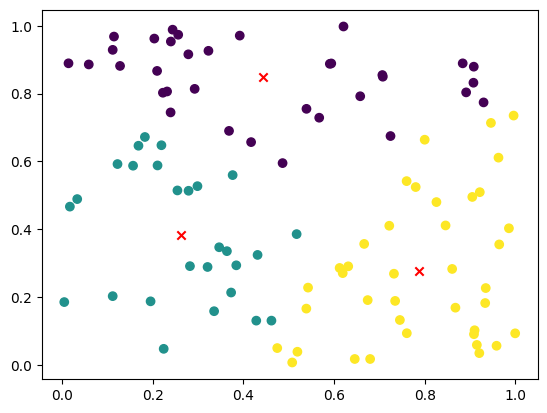

In [7]:
# EXAMPLE 1
### Example 1:

# Another basic implementation of the k-means clustering algorithm using NumPy and SciPy.

# The *cdist* function computes the pairwise distances between the centroids and the data points in the dataset $X$.
import numpy as np
from scipy.spatial.distance import cdist

def kmeans_basic(X, k, max_iter=100):
    # Initialize the centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]

    for i in range(max_iter):
        # Assign each data point to the nearest centroid
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)

        # Update the centroids
        for j in range(k):
            centroids[j] = np.mean(X[labels == j, :], axis=0)

    return labels, centroids

labels, centroids = kmeans_basic(X, k=3)
print(labels)

plot_data_clusters(X, labels, centroids)

In [8]:
#EXAMPLE 2

### Example 2: Computing the similarity between clusters using the mean distance between elements

# An implementation of a function to compute the similarity between clusters using the mean distance between elements:

# The *cdist* function computes the pairwise distances between all data points in the dataset $X$. We then iterate over the unique cluster labels and compute the mean distance between elements in each cluster. We sum up the mean distances for all clusters and divide by the number of clusters to obtain the average mean distance between elements. This value is then returned as the similarity measure between clusters.

# You can use this function to compare the performance of k-means clustering using different similarity measures, such as Euclidean distance and mean distance. Simply pass in the data X and the cluster labels obtained from k-means clustering. The function returns a similarity value that can be used to evaluate the clustering performance.



from scipy.spatial.distance import cdist

def mean_distance_similarity(X, labels):
    # Compute the mean distance between elements in each cluster
    distances = cdist(X, X)
    similarity = 0
    for i in np.unique(labels):
        cluster_distances = distances[labels == i, :][:, labels == i]
        similarity += np.mean(cluster_distances)

    # Normalize the similarity by the number of clusters
    similarity /= len(np.unique(labels))

    return similarity

# Compute the mean distance similarity
mean_distance_similarity = mean_distance_similarity(X, labels)
print(f'Mean distance similarity: {mean_distance_similarity:.2f}')

Mean distance similarity: 0.32


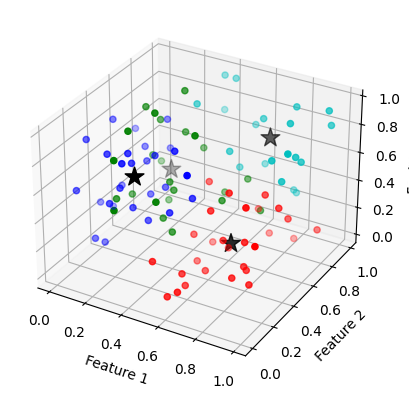

In [9]:
#EXERCISE 1
# Generate random data with 100 samples and 3 features
np.random.seed(42)
X = np.random.rand(100, 3)

# Perform k-means clustering with k=4
labels, centroids = kmeans_basic(X, k=4)


# Visualize the results using different marker styles for each cluster
figure = plt.figure()

axis = figure.add_subplot(111, projection='3d')
axis.set_xlabel('Feature 1')
axis.set_ylabel('Feature 2')
axis.set_zlabel('Feature 3')

colors = ['r', 'g', 'b', 'c']
for i in range(4):
    axis.scatter(X[labels == i, 0], X[labels == i, 1], X[labels == i, 2], c=colors[i], marker='o')
axis.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='k', marker='*', s=200)
plt.show()

Manhattan distance similarity: 0.61


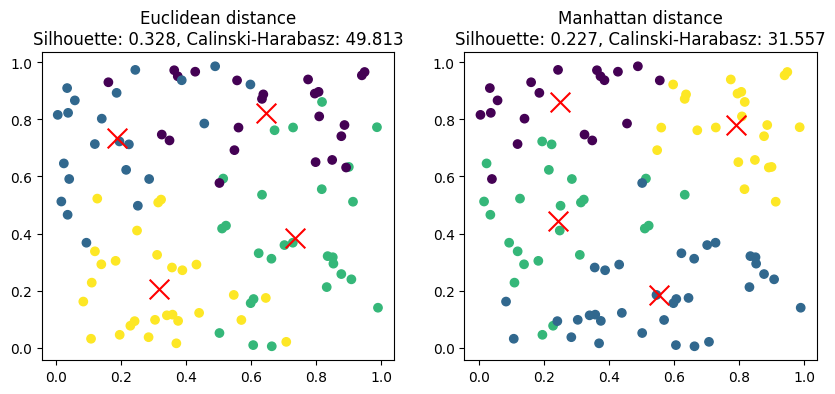

In [11]:
def manhattan_distance_similarity(X, labels):
    # Compute the Manhattan distance between elements in each cluster
    distances = cdist(X, X, 'cityblock')
    similarity = 0
    for i in np.unique(labels):
        cluster_distances = distances[labels == i, :][:, labels == i]
        similarity += np.mean(cluster_distances)

    # Normalize the similarity by the number of clusters
    similarity /= len(np.unique(labels))

    return similarity

# Compute the mean distance similarity
manhattan_distance_similarity = manhattan_distance_similarity(X, labels)
print(f'Manhattan distance similarity: {manhattan_distance_similarity:.2f}')






def kmeans_manhattan(X, k, max_iter=100):
    # Initialize the centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]

    for i in range(max_iter):
        # Assign each data point to the nearest centroid
        distances = cdist(X, centroids, metric='cityblock')
        labels = np.argmin(distances, axis=1)

        # Update the centroids
        for j in range(k):
            centroids[j] = np.mean(X[labels == j, :], axis=0)

    return labels, centroids








# Perform k-means clustering using Euclidean distance
labels_euc, centroids_euc = kmeans_basic(X, k=4)
silhouette_euc = silhouette_score(X, labels_euc)
calinski_euc = calinski_harabasz_score(X, labels_euc)

# Perform k-means clustering using Manhattan distance
labels_man, centroids_man = kmeans_manhattan(X, k=4)
silhouette_man = silhouette_score(X, labels_man, metric='cityblock')
calinski_man = calinski_harabasz_score(X, labels_man)







# Plot the results
figure, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 4))

axis1.scatter(X[:, 0], X[:, 1], c=labels_euc)
axis1.scatter(centroids_euc[:, 0], centroids_euc[:, 1], marker='x', s=200, c='r')
axis1.set_title(f"Euclidean distance\nSilhouette: {silhouette_euc:.3f}, Calinski-Harabasz: {calinski_euc:.3f}")

axis2.scatter(X[:, 0], X[:, 1], c=labels_man)
axis2.scatter(centroids_man[:, 0], centroids_man[:, 1], marker='x', s=200, c='r')
axis2.set_title(f"Manhattan distance\nSilhouette: {silhouette_man:.3f}, Calinski-Harabasz: {calinski_man:.3f}")

plt.show()

In [12]:
# Evaluate the clustering results using the Silhouette score
silhouette = silhouette_score(X, labels)
print(f'Silhouette score: {silhouette:.2f}')

# Evaluate the clustering results using the Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X, labels)
print(f'Calinski-Harabasz index: {calinski_harabasz:.2f}')

Silhouette score: 0.33
Calinski-Harabasz index: 50.07


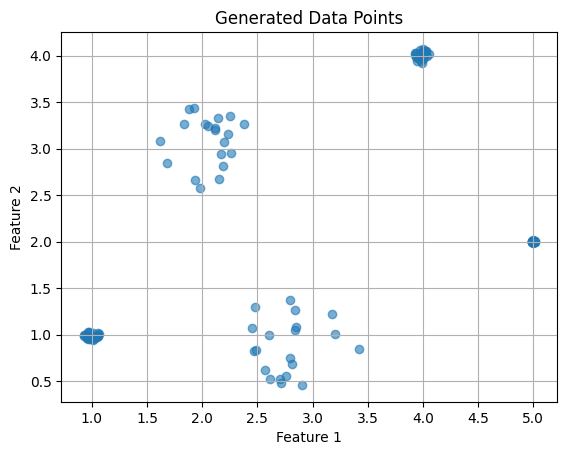

In [17]:
import random

# Generate a mock database with 5 clusters and 2 features
np.random.seed(0)

# Define the centroids
centroids = np.array([
    [1, 1],
    [2, 3],
    [3, 1],
    [4, 4],
    [5, 2]
])

# Define the radius of each cluster
radii = np.array([0.5, 0.7, 0.8, 0.6, 0.4])

# Define the number of points in each cluster
n_points = 20

# Generate the data points
X = np.zeros((n_points * len(centroids), 2))
for i in range(len(centroids)):
    r = random.uniform(0, radii[i])
    theta = np.random.uniform(0, 2*np.pi, n_points)
    x = r * np.sqrt(np.random.uniform(0, 1, n_points)) * np.cos(theta) + centroids[i, 0]
    y = r * np.sqrt(np.random.uniform(0, 1, n_points)) * np.sin(theta) + centroids[i, 1]
    X[i*n_points:(i+1)*n_points, 0] = x
    X[i*n_points:(i+1)*n_points, 1] = y

plot_data(X)

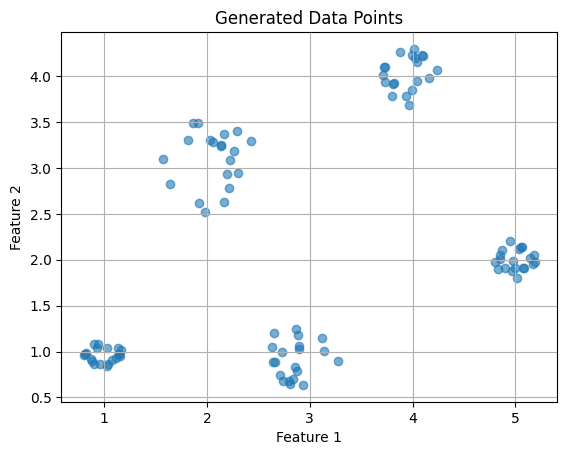

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

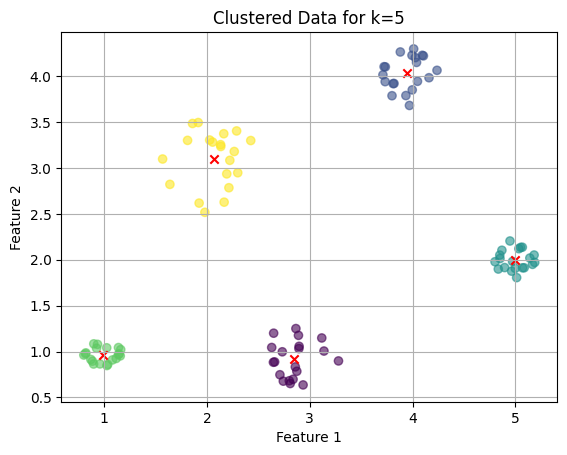

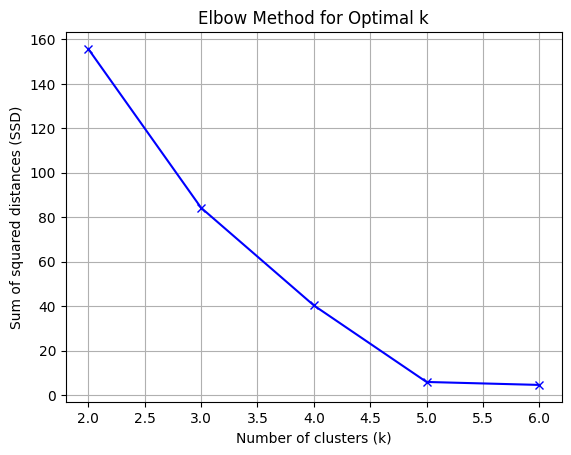

In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate a mock database with 5 clusters and 2 features
np.random.seed(0)

# Define the centroids
centroids = np.array([
    [1, 1],
    [2, 3],
    [3, 1],
    [4, 4],
    [5, 2]
])

# Define the radius of each cluster
radii = np.array([0.5, 0.7, 0.8, 0.6, 0.4])

# Define the number of points in each cluster
n_points = 20

# Generate the data points
X = np.zeros((n_points * len(centroids), 2))
for i in range(len(centroids)):
    r = random.uniform(0, radii[i])
    theta = np.random.uniform(0, 2 * np.pi, n_points)
    x = r * np.sqrt(np.random.uniform(0, 1, n_points)) * np.cos(theta) + centroids[i, 0]
    y = r * np.sqrt(np.random.uniform(0, 1, n_points)) * np.sin(theta) + centroids[i, 1]
    X[i * n_points:(i + 1) * n_points, 0] = x
    X[i * n_points:(i + 1) * n_points, 1] = y

# Function to plot data
def plot_data(X):
    plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Generated Data Points')
    plt.grid(True)
    plt.show()

plot_data(X)

# Define the range of k values to try
k_range = range(2, 7)

# Compute the sum of squared distances for each k value
ssd = []
best_labels = None
best_centroids = None

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
    if k == 5:  # Assuming you want to plot for k=5, you can change this as needed
        best_labels = kmeans.labels_
        best_centroids = kmeans.cluster_centers_

# Function to plot data with cluster assignments
def plot_data_clusters(X, labels, centroids, k):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Clustered Data for k={k}')
    plt.grid(True)
    plt.show()

# Plot clustered data for best k (here k=5)
plot_data_clusters(X, best_labels, best_centroids, 5)

# Plot the elbow curve
plt.figure()
plt.plot(k_range, ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


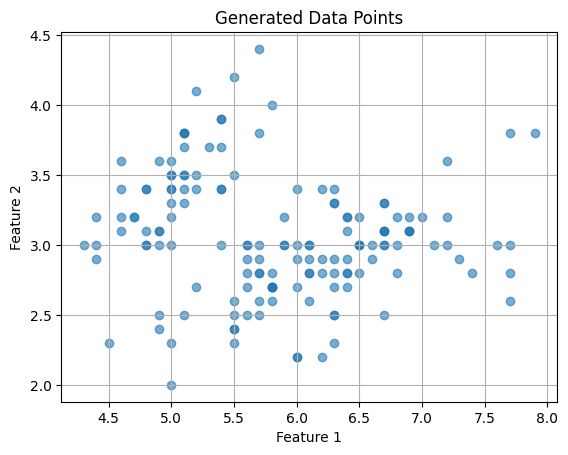

In [23]:
# EXERCISE 4

from sklearn.datasets import load_iris


# Load the iris dataset
iris = load_iris()
X = iris.data

plot_data(X)






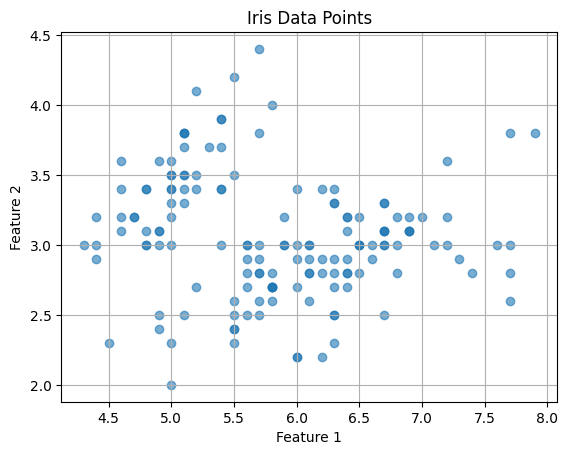

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


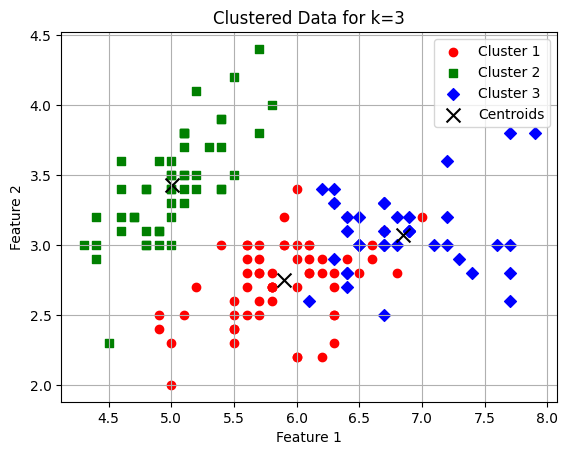

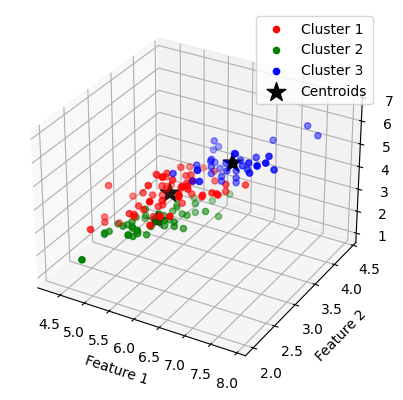

Silhouette Score: 0.55
Calinski-Harabasz Index: 561.63


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Load the iris dataset
iris = load_iris()
X = iris.data

# Function to plot data
def plot_data(X):
    plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Iris Data Points')
    plt.grid(True)
    plt.show()

plot_data(X)

# Perform k-means clustering with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Function to plot data with cluster assignments using different marker styles
def plot_data_clusters_m(X, labels, centroids):
    markers = ['o', 's', 'D']
    colors = ['r', 'g', 'b']
    for i in range(k):
        cluster_points = X[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], marker=markers[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Clustered Data for k={k}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_data_clusters_m(X, labels, centroids)

# Visualize the results using different marker styles for each cluster in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

colors = ['r', 'g', 'b']
for i in range(k):
    ax.scatter(X[labels == i, 0], X[labels == i, 1], X[labels == i, 2], c=colors[i], marker='o', label=f'Cluster {i+1}')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='k', marker='*', s=200, label='Centroids')
plt.legend()
plt.show()

# Evaluate the clustering performance using silhouette score and Calinski-Harabasz index
sil_score = silhouette_score(X, labels)
ch_score = calinski_harabasz_score(X, labels)
print(f'Silhouette Score: {sil_score:.2f}')
print(f'Calinski-Harabasz Index: {ch_score:.2f}')
